# Exercise 6: Classical Design of Experiments II

#### 1) For which kind of experiments it is recommended to include statistical techniques and why?

BEGIN SOLUTION

It is recommended if the experiments are not numerical simulations, unless it is entended to asses the influence the noise factors will have in operations, as it is done in MORDO analysis.

END SOLUTION

#### 2) HowTo perform a DOE, describe the important steps.

BEGIN SOLUTION

- choose the variables (factors): values are restricted and in general small, they are qualitative discret or quanitative discrete (if quantitative continuous, then the variables must be discretizrd within their value range)
- define design space/region of interest (range of variablility for each variable). It can be adjusted later on after gaining more knowledge about it.
-select DOE method and the number of levels (number of different values a variable can assume according to its discretisation). Ask yourself, if number of levels remains the same or differs for ech variable. 

END SOLUTION

#### 3) In the lecture we learned about three kinds of DOE in general: a) Factorial Designs, b) Response-Surface Designs, c) Randomizes Designs. What do these techniques have in common, and how do they differ. 

BEGIN SOLUTION

a) The primary purpose of the experiment is to select or screen out the few
important main effects from the many less important ones.
These factoral designs are also called screening or termed main effects designs.

b) The experiment is designed to allow us to estimate interaction and even quadratic
effects, and therefore give us an idea of the (local) shape of the response surface
we are investigating. For this reason, they are termed response surface method (RSM)
designs. RSM designs are used to:

    - Find improved or optimal process settings
    - Troubleshoot process problems and weak points
    - Make a product or process more robust against external
      and non-controllable influences. "Robust" means relatively
      insensitive to these influences.

c) If you have one or several factors under investigation, but the primary goal of
your experiment is to make a conclusion about one a-priori important factor,
(in the presence of, and/or in spite of the existence of the other factors),
and the question of interest is whether or not that factor is "significant",
(i.e., whether or not there is a significant change in the response for different
levels of that factor), then you have a comparative problem and you need a
comparative design solution, where the randomized designs fall in.



END SOLUTION


#### 4) Implement the following DOEs: a) Full Factorial, b) Box-Behnken and 3) Latin-Hypercube in the files (_full_factorial, _box_behnken, _latin_hypercube) in the folder e2ml/experimentation. Then import them here into this notebook.

In [1]:
# BEGIN SOLUTION
from e2ml.experimentation._full_factorial import full_fac
from e2ml.experimentation._box_behnken import box_behnken
from e2ml.experimentation._latin_hypercube import lat_hyp_cube
# END SOLUTION

#### 5) Import the blackboxes foo1, foo2, foo3, generate a design matrix via DOEs a), b), c) from task 4 above, i.e., input your values and do some visualized analysis on the results.

In [3]:
from e2ml.experimentation._data_generator import foo1, foo2, foo3  # <-- SOLUTION

def generate_data(foo, DOE, levels=None):
    """
    Method for generating data of process foo with DOE.

    Parameters
    --------------
    foo: function handle with input size n
    DOE: specifying the DOE
    depending on your DOE you have optional levels or factors
    levels : array-like An array of integers that indicate the number of levels of each input design factor.
    n : number of factors

    Output
    -------------
    1000 datapoints generated by process foo evaluated at the entries of levels
    """
    if DOE == full_fac:  # <-- SOLUTION
        mat = DOE(levels) # <-- SOLUTION
    else:  # <-- SOLUTION
        n = len(levels)
        mat = DOE(n) # <-- SOLUTION
    return foo(*[mat[:,i] for i in range(mat.shape[1])]) # <-- SOLUTION

# define useful levels
levels1 = [10, 10, 10, 10, 10, 10]  # <-- SOLUTION
levels2 = [10, 10, 10 , 10]  # <-- SOLUTION
levels3 = [20, 10]  # <-- SOLUTION

# design matrices:
mat_full_fac_foo1 = generate_data(foo1, full_fac, levels1)  # <-- SOLUTION
mat_full_fac_foo2 = generate_data(foo2, full_fac, levels2)  # <-- SOLUTION
mat_full_fac_foo3 = generate_data(foo3, full_fac, levels3)  # <-- SOLUTION


mat_box_behnken_foo1 = generate_data(foo1, box_behnken, levels1)  # <-- SOLUTION
mat_box_behnken_foo2 = generate_data(foo2, box_behnken, levels2)  # <-- SOLUTION

mat_lat_hyp_cube_foo1 = generate_data(foo1, lat_hyp_cube, levels1)  # <-- SOLUTION
mat_lat_hyp_cube_foo2 = generate_data(foo2, lat_hyp_cube, levels2)  # <-- SOLUTION
mat_lat_hyp_cube_foo3 = generate_data(foo3, lat_hyp_cube, levels3)  # <-- SOLUTION



6) Use the PCA from the exercises before to visualize the different designs of experiments in 2D.¶

In [7]:
import numpy as np
y = generate_data(foo1, full_fac, levels1)
X = full_fac(levels1)

In [5]:
from sklearn.gaussian_process import GaussianProcessClassifier
gp = GaussianProcessClassifier().fit(X, y)
gp.score(X, y)

1.0

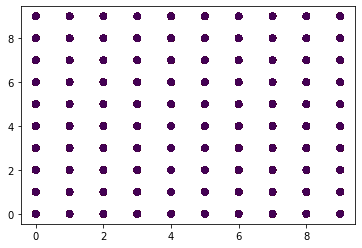

In [8]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)